# 911 Calls Capstone Project

## Data and Setup

**Importing the used libraries**

In [30]:
import numpy as np 
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

** Reading the dataset and accessing it **

In [32]:
df = pd.read_csv('911.csv')

In [33]:
df.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 17:40:01,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Top 5 ZIP codes for the calls **

In [35]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** Top 5 townships of the calls **

In [36]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Unique Codes in the 'title' column**

In [37]:
df['title'].nunique()

110

## Engineering Features.

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Creating a new column called "Reason" that contains this string value.** 

In [38]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

** Finding the most common reason for the call**

In [39]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

**Creating a Countplot**

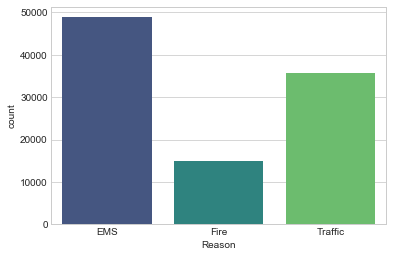

In [40]:
sns.set_style(style = 'whitegrid')
sns.countplot(x = df['Reason'], data = df, palette = 'viridis')

** Now focusing on timestamp**  
First accessing the type

In [41]:
type(df['timeStamp'][0])

str

**Converting the timestamps from str to datetime object**  
Using my kaggle [Parsing Date Kernel](https://www.kaggle.com/hashbanger/data-cleaning-challenge-parsing-dates)

In [42]:
import datetime 

In [43]:
df['datesParsed'] = pd.to_datetime(df['timeStamp'])

**Now dropping the timestamp column**

In [44]:
df = df.drop('timeStamp', axis = 1)

** specific attributes from a 'datesParsed' can be grabbed**

In [45]:
time = df['datesParsed'].iloc[0]
time.hour

17

**Since the timestamp column are actually DateTime objects, we create 3 new columns called Hour, Month, and Day of Week.**

In [46]:
df['Hour'] = df['datesParsed'].apply(lambda date: date.hour)
df['Month'] = df['datesParsed'].apply(lambda date: date.month)
df['Day'] = df['datesParsed'].apply(lambda date: date.weekday())

In [47]:
df.head(1)

,lat,lng,desc,zip,title,twp,addr,e,Reason,datesParsed,Hour,Month,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00,17,12,3


**Since the day has been valued in integer form from 0 through 6, so they need to be mapped as actual names**

In [48]:
daymap = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

In [49]:
df['Day'] = df['Day'].map(daymap)

In [50]:
df.head(1)

,lat,lng,desc,zip,title,twp,addr,e,Reason,datesParsed,Hour,Month,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00,17,12,Thursday


** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

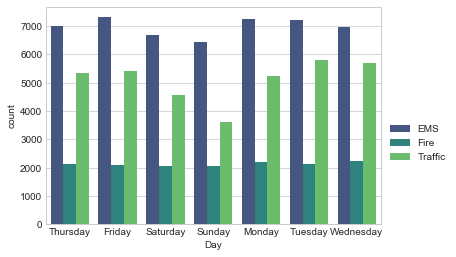

In [51]:
sns.countplot(x= df['Day'], hue = df['Reason'], palette = 'viridis')
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5))

**Doing the same for Month:**

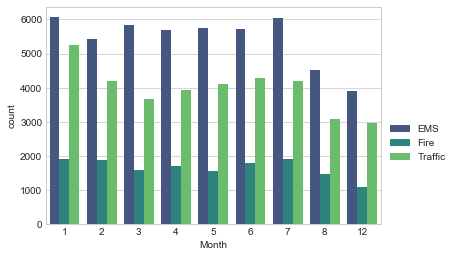

In [52]:
sns.countplot(x =  df['Month'],hue = df['Reason'], palette = 'viridis')
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))

**From the plot it can be observed that the months 9,10 and 11 are missing.  
This information can be filled by plotting the information in another way, a simple line plot that fills in the missing months.**

**Grouping by month**

In [53]:
byMonth = df.groupby('Month').count()

In [54]:
byMonth.head()

,lat,lng,desc,zip,title,twp,addr,e,Reason,datesParsed,Hour,Day
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11420,11378,11423,11423,11423,11423,11423


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

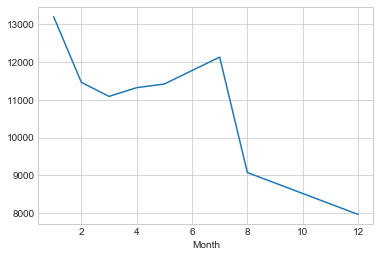

In [55]:
byMonth['twp'].plot()

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

In [56]:
byMonth = byMonth.reset_index()

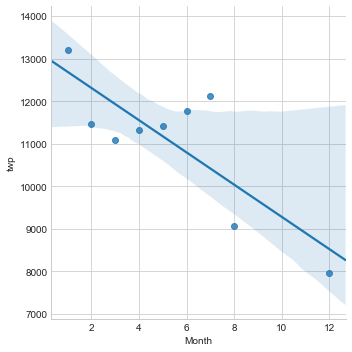

In [57]:
sns.lmplot(x= 'Month', y = 'twp', data = byMonth)

** The shaded area basically shows errors which is true since we don't have much information for months 9, 10 and 11**

**Creating a new column 'Date' that contains only the date from the datesParsed column.** 

In [58]:
df['Date'] = df['datesParsed'].apply(pd.datetime.date)

In [59]:
df.head(1)

,lat,lng,desc,zip,title,twp,addr,e,Reason,datesParsed,Hour,Month,Day,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00,17,12,Thursday,2015-12-10


** Now grouping the Date column with the count() aggregate and plotting**

In [60]:
byDate = df.groupby('Date').count()
byDate.head()

,lat,lng,desc,zip,title,twp,addr,e,Reason,datesParsed,Hour,Month,Day
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,113,115,115,115,115,115,115
2015-12-11,396,396,396,333,396,395,391,396,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,401,403,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,317,319,319,319,319,319,319
2015-12-14,447,447,447,387,447,446,445,447,447,447,447,447,447


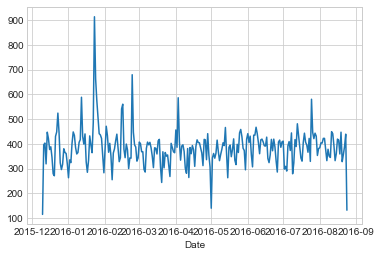

In [61]:
byDate['lat'].plot()

**Recreating the plots with separate reasons**

Text(0.5,1,'Traffic')

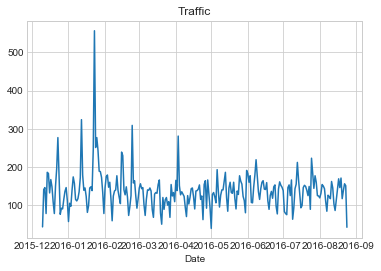

In [71]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')

Text(0.5,1,'Fire')

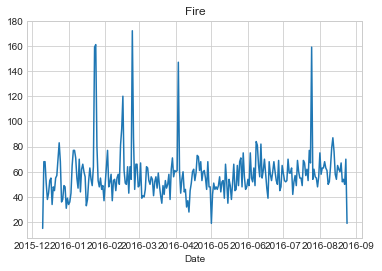

In [70]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')

Text(0.5,1,'EMS')

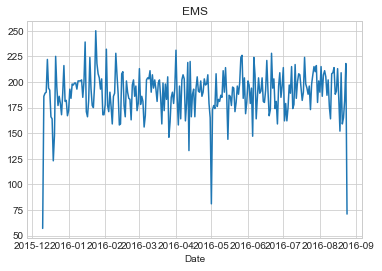

In [72]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')

____
**Restructuring the dataframemake 'Hours' as the columns and the Index becomes the 'Day'.**

In [121]:
df_hour = df.groupby(by = ['Day','Hour']).count()['twp'].unstack()
df_hour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,
Friday,275,235,191,175,201,194,372,598,742,752,...,931,980,1039,980,819,696,667,558,514,474
Monday,282,220,201,194,204,267,397,653,819,785,...,869,913,988,997,885,746,612,496,471,325
Saturday,373,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,627,571,505,467
Sunday,383,304,285,268,242,240,300,401,483,620,...,684,691,663,714,670,654,537,461,415,330
Thursday,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1011,810,698,617,553,424,354
Tuesday,269,240,186,170,209,239,414,655,889,878,...,942,938,1026,1018,905,731,647,570,462,274
Wednesday,249,216,189,207,156,254,409,701,875,808,...,903,867,989,1036,894,686,668,574,490,334


** Creating a Heatmap using the new DataFrame**

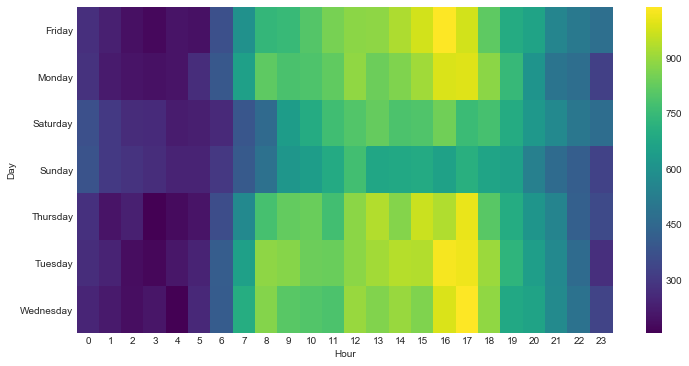

In [122]:
plt.figure(figsize = (12,6))
sns.heatmap(df_hour, cmap = 'viridis')

**We can observe the relation between Wednesday, Tuesday, Monday, Thursday and Friday during the hours 16 and 17  
Same can be observed from the Clustermap Below**

** Creating  a Clustermap**

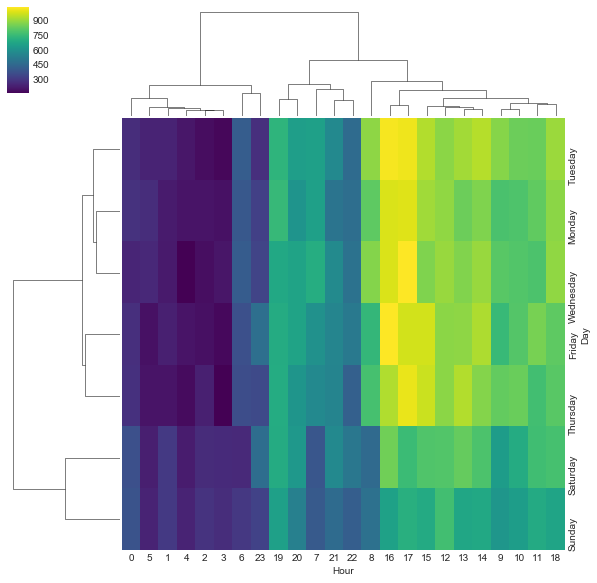

In [123]:
sns.clustermap(df_hour, cmap = 'viridis')

** Plotting the same now with 'Month' as the column**

In [132]:
df_month = df.groupby(by = ['Day','Month']).count()['twp'].unstack()
df_month

Month,1,2,3,4,5,6,7,8,12
Day,,,,,,,,,
Friday,1970,1581,1523,1958,1730,1649,2045,1310,1064
Monday,1727,1964,1533,1597,1779,1617,1692,1509,1256
Saturday,2290,1440,1264,1732,1444,1388,1695,1099,978
Sunday,1960,1229,1100,1488,1422,1331,1672,1021,907
Thursday,1584,1596,1900,1601,1590,2065,1646,1227,1265
Tuesday,1973,1753,1884,1430,1917,1673,1668,1612,1233
Wednesday,1699,1902,1888,1517,1538,2054,1715,1295,1260


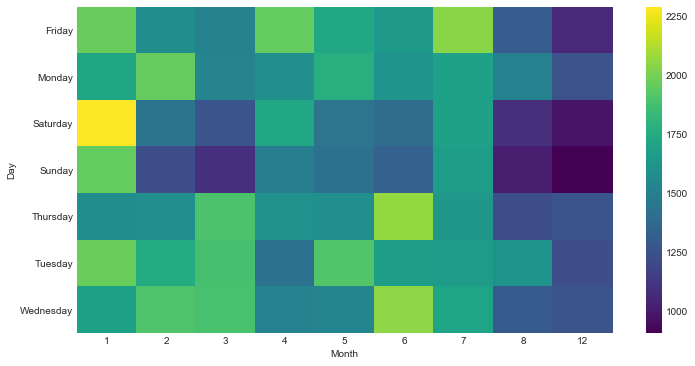

In [138]:
plt.figure(figsize = (12,6))
sns.heatmap(df_month, cmap = 'viridis')

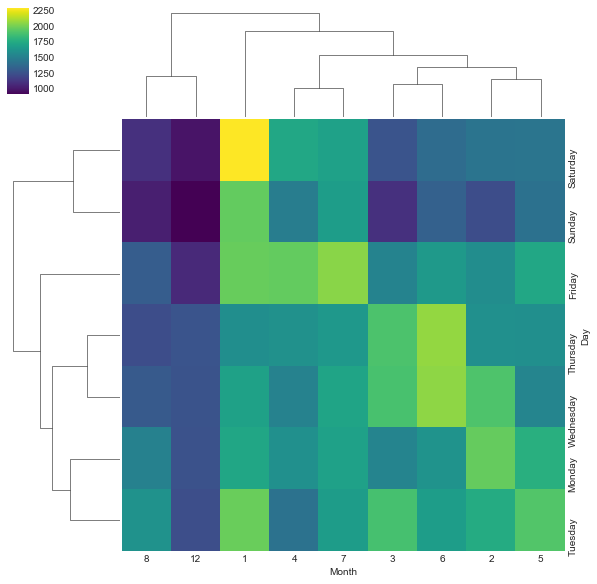

In [135]:
sns.clustermap(df_month, cmap = 'viridis')